# Task
* For this assignment, you will continue revisiting your first project to predict supermarket sales. You will be applying everything you've learned thus far this week to explain how your models made their predictions.

# Project 1 Revisited - Part 2: Global Explanations
## Load Your Saved Joblib File
* Create a new notebook for this assignment in your project 1 repository. Name the notebook "Explaining Models with Shap.ipynb"
* In your notebook, load the contents of your "best-models.joblib" file into a variable called "loaded_joblib."
* Save each object from the loaded_joblib dictionary as a separate variable in your notebook. (e.g. "X_train = loaded_joblib['X_train'])
## Explain your tree-based model with shap:
* Create an X_shap and y_shap variable from your training data (use shap.sample as needed).
* Create a model explainer,
* Calculate the shap values for your model.
* Create a summary plot - with plot_type='bar':
    * In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.
        * Are they the same features in both? If not, what's different?
    * Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).
* Create a second summary plot - with plot_type='dot'
* In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
* Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).
## Update your README.
* Insert your exported figures and corresponding interpretations from above into your README file. You should have:
    * a summary plot - bar version
        * Your comparison of most important features found by shap vs feature importance.
    * a summary plot - dot version
        * Your interpretation of the top 3 most important features and how they influence your model's predictions.

# Loading Joblib files.

In [1]:
import joblib
loaded_joblib = joblib.load('/Users/Rashad/Documents/GitHub/Project-1-Revisited/Data/project1_revisited.joblib')
loaded_joblib.keys()  #confirming keys of loaded joblib dictionary

dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForest'])

In [2]:
preprocessor = loaded_joblib['preprocessor']
X_train_df = loaded_joblib['X_train']
X_test_df = loaded_joblib['X_test']
y_train = loaded_joblib['y_train']
y_test = loaded_joblib['y_test']
lin_reg = loaded_joblib['LinearRegression']
rf_reg = loaded_joblib['RandomForest']

# Explain your tree-based model with shap:

## Create an X_shap and y_shap variable from your training data (use shap.sample as needed).

In [3]:
## fit random forest to evaluate the model

rf_reg.fit(X_train_df,y_train)
print(f"Training R^2: {rf_reg.score(X_train_df,y_train):.3f}")
print(f"Test R^2: {rf_reg.score(X_test_df, y_test):.3f}")

Training R^2: 0.937
Test R^2: 0.570


## Taking a sample of dataframe using the shap sampler

In [4]:
len(X_train_df)  #checking length of dataframe.

6392

In [5]:
import shap
shap.initjs()  #instantiate shap.

# getting a sample of 300 rows of data using SHAP
X_shap = shap.sample(X_train_df, nsamples=300, random_state=23)

## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]

## Creating model explainer for tree-based model (RandomForestRegressor)

In [6]:
# SHAP model explainer of RandomForestRegressor
rf_reg_explainer = shap.Explainer(rf_reg)
rf_reg_explainer

## SHAP values
* Using SHAP explainer to create SHAP values

In [7]:
rf_reg_shap_values = rf_reg_explainer(X_shap,y_shap)
rf_reg_shap_values.shape

(300, 31)

## Summary Plot - plot_type = 'bar'

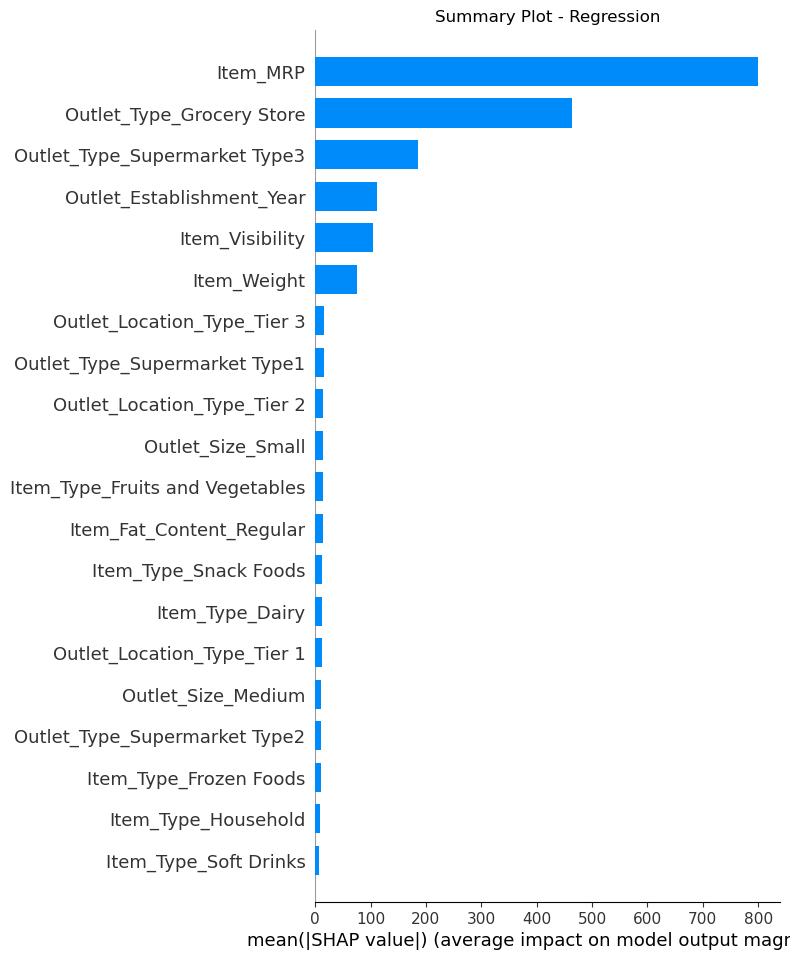

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
shap.summary_plot(rf_reg_shap_values, X_shap, plot_type='bar', show=False)
ax.set_title('Summary Plot - Regression');
fig.savefig('/Users/Rashad/Documents/GitHub/Project-1-Revisited/Images/rf_reg_SHAP_summary_barplot.png')

### Saved Feature Importace graph for Project1_Part1

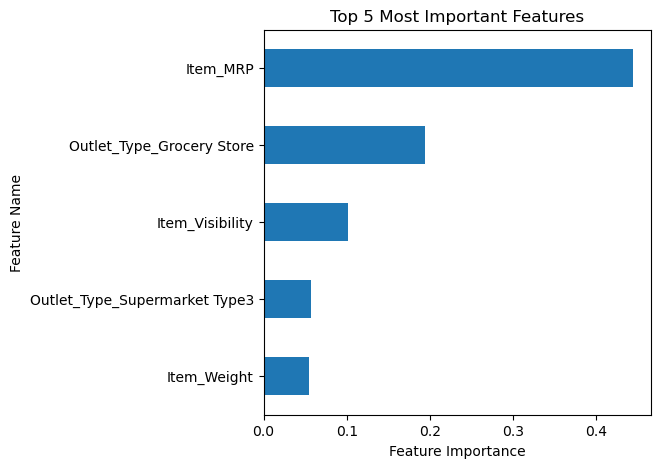

---

* Four of the Top 5 Most Important Features **(Item_MRP, Outlet_Type_Grocery Store, Item_Visibility, and Outlet_Type_Supermarket Type3)** are shared with the top five items in our Shap summary plot of features that contributed to the most to the model decision process.

---

## Summary Plot - plot_type = 'dot'

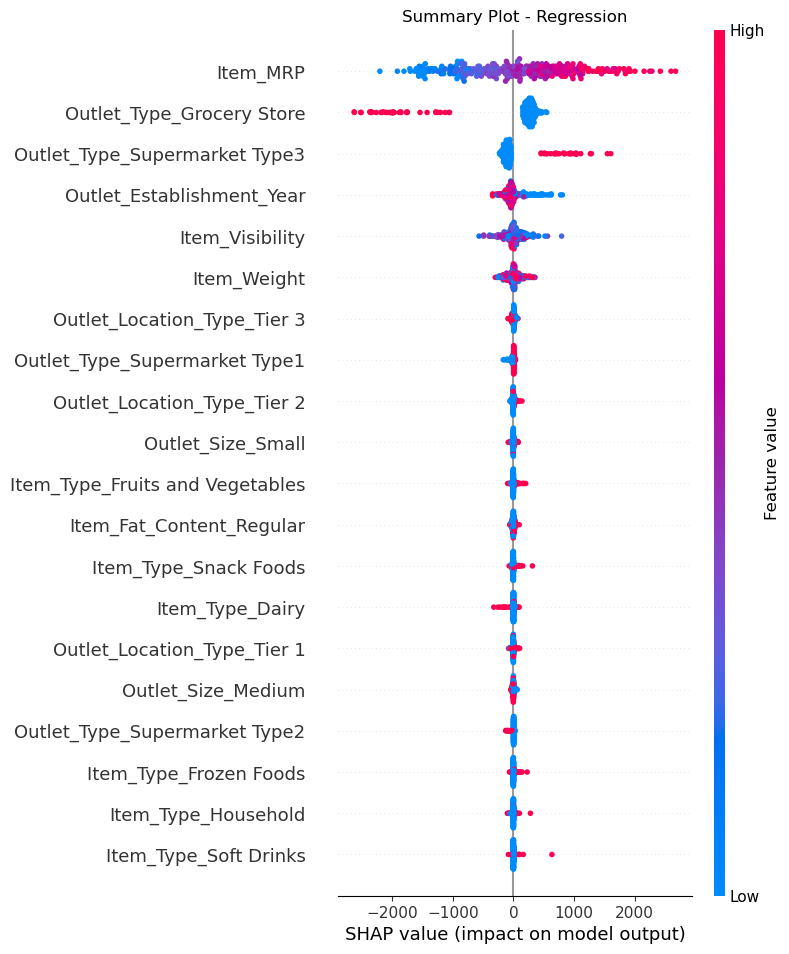

In [10]:
fig, ax = plt.subplots()
shap.summary_plot(rf_reg_shap_values, X_shap, plot_type='dot', show=False)
ax.set_title('Summary Plot - Regression');
fig.savefig('/Users/Rashad/Documents/GitHub/Project-1-Revisited/Images/rf_reg_SHAP_summary_dotplot.png')

Explanation of the top 3 items in the Dot-plot:
1. Item_MRP:  The higher the item manufacture retail price of the individual item, the higher the positivly predicted price of the item for the retail outlet.
2. Outlet_Type_Grocery Store:  Outlet types of classification "Grocery Store" will be predicted more negatively towards total item retail price.
3. Outlet_Type_Supermarket Type3:  Outlet types of classification "Supermarket Type3" will predicted with more positively (higher) items prices for the retail outlet.